In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [23]:
df = pd.read_csv('train.csv', usecols=['Age','Parch','SibSp','Pclass','Survived'])

In [25]:
df.head()

,Survived,Pclass,Age,SibSp,Parch
0,0,3,22.0,1,0
1,1,1,38.0,1,0
2,1,3,26.0,0,0
3,1,1,35.0,1,0
4,0,3,35.0,0,0


In [27]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
dtype: int64

In [29]:
df.isnull().mean()

Survived    0.000000
Pclass      0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
dtype: float64

In [31]:
df.shape

(891, 5)

In [33]:
df.dropna(inplace=True)

In [35]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
dtype: int64

In [37]:
df.shape

(714, 5)

In [43]:
df.sample(5)

,Survived,Pclass,Age,SibSp,Parch
719,0,3,33.0,0,0
432,1,2,42.0,1,0
281,0,3,28.0,0,0
516,1,2,34.0,0,0
147,0,3,9.0,2,2


In [49]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [51]:
X.head()

,Pclass,Age,SibSp,Parch
0,3,22.0,1,0
1,1,38.0,1,0
2,3,26.0,0,0
3,1,35.0,1,0
4,3,35.0,0,0


In [53]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=42)

In [57]:
X_train

,Pclass,Age,SibSp,Parch
328,3,31.0,1,1
73,3,26.0,1,0
253,3,30.0,1,0
719,3,33.0,0,0
666,2,25.0,0,0
...,...,...,...,...
92,1,46.0,1,0
134,2,25.0,0,0
337,1,41.0,0,0
548,3,33.0,1,1


In [59]:
X_test

,Pclass,Age,SibSp,Parch
149,2,42.0,0,0
407,2,3.0,1,1
53,2,29.0,1,0
369,1,24.0,0,0
818,3,43.0,0,0
...,...,...,...,...
819,3,10.0,3,2
164,3,1.0,4,1
363,3,35.0,0,0
56,2,21.0,0,0


In [61]:
lr = LogisticRegression()

In [63]:
lr.fit(X_train, y_train)

LogisticRegression()

In [65]:
y_pred = lr.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score

In [73]:
print("Accuracy Score of the model before any feature construction : ", accuracy_score(y_test,y_pred)*100)

Accuracy Score of the model before any feature construction :  69.23076923076923


<h1> Feature Construction </h1>

In [76]:
df_new = df.copy() 

In [78]:
df_new

,Survived,Pclass,Age,SibSp,Parch
0,0,3,22.0,1,0
1,1,1,38.0,1,0
2,1,3,26.0,0,0
3,1,1,35.0,1,0
4,0,3,35.0,0,0
...,...,...,...,...,...
885,0,3,39.0,0,5
886,0,2,27.0,0,0
887,1,1,19.0,0,0
889,1,1,26.0,0,0


In [80]:
df_new['family_size'] = df_new['Parch']+df_new['SibSp']+1

In [86]:
df_new.sample(5)

,Survived,Pclass,Age,SibSp,Parch,family_size
205,0,3,2.0,0,1,2
60,0,3,22.0,0,0,1
642,0,3,2.0,3,2,6
74,1,3,32.0,0,0,1
203,0,3,45.5,0,0,1


In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='family_size', ylabel='Density'>

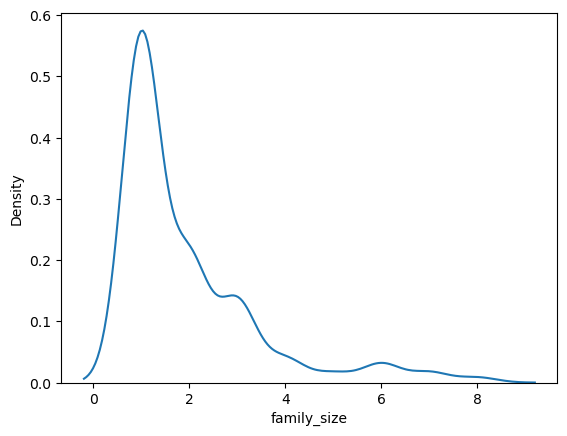

In [93]:
sns.kdeplot(df_new['family_size'])

In [98]:
def fam_con(num):
    if num == 1:
        return 0
    elif num > 1 and num <= 4:
        return 1
    else:
        return 2

# 0 for single person travelling
# 1 for small family travelling
# 2 for large family travelling

        

In [100]:
df_new['family_type'] = df_new['family_size'].apply(fam_con)

In [104]:
df_new.sample(5)

,Survived,Pclass,Age,SibSp,Parch,family_size,family_type
252,0,1,62.0,0,0,1,0
715,0,3,19.0,0,0,1,0
272,1,2,41.0,0,1,2,1
787,0,3,8.0,4,1,6,2
249,0,2,54.0,1,0,2,1


In [109]:
df_new.drop(columns=['SibSp','Parch','family_size'], inplace=True)

In [111]:
df_new

,Survived,Pclass,Age,family_type
0,0,3,22.0,1
1,1,1,38.0,1
2,1,3,26.0,0
3,1,1,35.0,1
4,0,3,35.0,0
...,...,...,...,...
885,0,3,39.0,2
886,0,2,27.0,0
887,1,1,19.0,0
889,1,1,26.0,0


In [123]:
X2 = df_new.iloc[:,1:]
Y2 = df_new.iloc[:,0]

In [125]:
X2

,Pclass,Age,family_type
0,3,22.0,1
1,1,38.0,1
2,3,26.0,0
3,1,35.0,1
4,3,35.0,0
...,...,...,...
885,3,39.0,2
886,2,27.0,0
887,1,19.0,0
889,1,26.0,0


In [127]:
Y2

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [129]:
X_train2, x_test2, y_train2, y_test2 =train_test_split(X2,Y2, test_size=0.2, random_state=42)

In [135]:
X_train2

,Pclass,Age,family_type
328,3,31.0,1
73,3,26.0,1
253,3,30.0,1
719,3,33.0,0
666,2,25.0,0
...,...,...,...
92,1,46.0,1
134,2,25.0,0
337,1,41.0,0
548,3,33.0,1


In [139]:
lr2 = LogisticRegression()

In [141]:
lr2.fit(X_train2, y_train2)

LogisticRegression()

In [143]:
y_pred2 = lr2.predict(x_test2)

In [151]:
print("Accuracy Score of the model after feature construction : ", accuracy_score(y_test2,y_pred2)*100)

Accuracy Score of the model after feature construction :  66.43356643356644


In [154]:
from sklearn.model_selection import cross_val_score

In [156]:
np.mean(cross_val_score(LogisticRegression(),X2,Y2,scoring='accuracy', cv=20))

0.7003174603174602